In [4]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

In [50]:
def derivada_x(img):
    alto= img.shape[0]
    ancho = img.shape[1]
    
    derivate_img = np.zeros((alto,ancho,1))
    
    kernel = np.array([[1/16,2/16,1/16], [2/16,4/16,2/16], [1/16,2/16,1/16]])
    
    img = convolutional_filter(img,kernel)
    
    for i in range(0, alto):
        for j in range(0,(ancho-1)):
            pixel = img[i,j] - img[i,j+1]
            derivate_img[i,j]=pixel
                
    return derivate_img


In [48]:
def derivada_y(img):
    alto= img.shape[0]
    ancho = img.shape[1]
    
    derivate_img = np.zeros((alto,ancho,1))
    
    kernel = np.array([[1/16,2/16,1/16], [2/16,4/16,2/16], [1/16,2/16,1/16]])
    
    img = convolutional_filter(img,kernel)
    
    for i in range(0, alto-1):
        for j in range(0,(ancho)):
            pixel = img[i,j] - img[i+1,j]
            derivate_img[i,j]=pixel
    return derivate_img

In [31]:
def get_magnitude_img(img_x,img_y):
    return np.sqrt(img_x**2+img_y**2)

In [7]:
def convert_to_gray(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

In [8]:
def read_picture_from_disk(path_plus_name):
    img_temp = cv2.imread(path_plus_name)
    img_temp = cv2.cvtColor(img_temp, cv2.COLOR_BGR2RGB)
    return img_temp

In [9]:
def show_picture(img, mapper=None):#opencv lee en BGR, matplotlib en RGB
    if mapper:
        plt.imshow(img, cmap=mapper)
    else:
        plt.imshow(img)

(420, 1024)


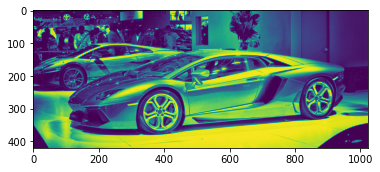

In [47]:
#carro = read_picture_from_disk('carro.jpg')
carro = cv2.imread('carro.jpg', cv2.IMREAD_GRAYSCALE)
show_picture(carro)
print(carro.shape)
#new_carro = convert_to_gray(carro)
#new_carro = apply_gaussian_filter(new_carro)
#show_picture(new_carro)

In [15]:
print(new_carro.shape)

(420, 1024)


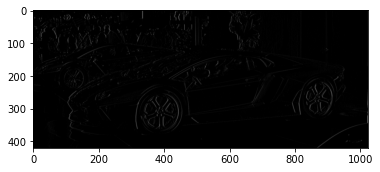

In [51]:
derivada_x_pic=derivada_x(carro)
write_picture_disk('carr_deri.jpg',derivada_x_pic)
show_picture(read_picture_from_disk('carr_deri.jpg'))


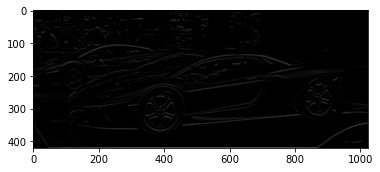

In [49]:
derivada_y_pic=derivada_y(new_carro)
write_picture_disk('carr_deri_y.jpg',derivada_y_pic)
show_picture(read_picture_from_disk('carr_deri_y.jpg'))

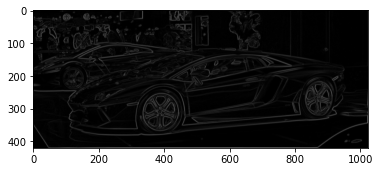

In [52]:
magnitude = get_magnitude_img(derivada_x_pic,derivada_y_pic)
write_picture_disk('carr_mag.jpg',magnitude)
show_picture(read_picture_from_disk('carr_mag.jpg'))

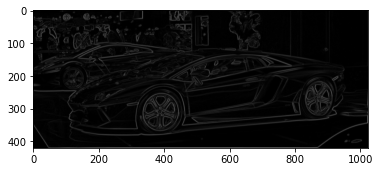

In [53]:
fase = fase(derivada_x_pic,derivada_y_pic)
write_picture_disk('fase.jpg',magnitude)
show_picture(read_picture_from_disk('fase.jpg'))

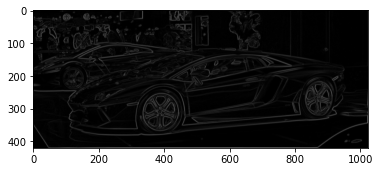

In [54]:
nms = non_maximum_suppression(magnitude,fase)
write_picture_disk('nms.jpg',magnitude)
show_picture(read_picture_from_disk('nms.jpg'))

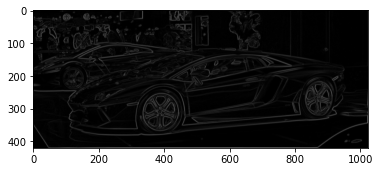

In [58]:
canny = threshhold(nms)
write_picture_disk('canny.jpg',magnitude)
show_picture(read_picture_from_disk('canny.jpg'))

In [24]:
def write_picture_disk(path_plus_name,img):
    cv2.imwrite(path_plus_name,img)

In [27]:
def apply_gaussian_filter(img):
    blur = cv2.GaussianBlur(img,(5,5),0)
    return blur

In [34]:
def convolutional_filter(imagen, kernel):
    alto = imagen.shape[0]
    ancho =  imagen.shape[1]
    
    altoKernel = len(kernel[:,0])
    anchoKernel = len(kernel[0,:])

    #parte entera del centro del kernel
    step = int(len(kernel[0,:])/2)

    
    newImg = np.zeros((alto, ancho, 1))
    
    for i in range(step, alto - step):
        newPixel = 0
        for j in range(step, ancho - step):
            ventana = imagen[i-step:i+2*step, j-step:j+2*step]
            newPixel = 0
            for m in range(0, altoKernel):
                for n in range(0, anchoKernel):
                    newPixel = newPixel + ventana[m, n] * kernel[m, n]
            newImg[i, j] = int(newPixel)
    
    return newImg


In [39]:
def fase(dx,dy):
    alto = dx.shape[0]
    ancho =  dx.shape[1] 
    
    fase = np.zeros((alto,ancho,1))
    
    for i in range(0, alto-1):
        for j in range(0,(ancho)):
            angulo = int((180/math.pi)*math.atan2(dy[i,j],dx[i,j]))
            fase[i,j] = angulo
    return fase 

In [37]:
def non_maximum_suppression(magImage, phaseImage):
    alto = magImage.shape[0]
    ancho =  magImage.shape[1]
    
    newImg = np.zeros((alto, ancho,1))
    val1 = 0
    val2 = 0
    val3 = 0
    alpha = 0.1
    for i in range(1, alto - 2):
        for j in range(1, ancho - 2):
            ventana = magImage[i-1:i+2, j-1:j+2]
            angulo = phaseImage[i, j]
            vDerecha = magImage[i - 1, j]
            vIzquierda = magImage[i + 1, j]
            if(((angulo > 337)  or (angulo <= 23)) or ((angulo >= 157) and (angulo <= 203))):
                val1 = ventana[1,0]
                val2 = ventana[1,1]
                val3 = ventana[1,2]
            elif(((angulo > 23) and (angulo <= 67)) or ((angulo > 203) and (angulo <= 248))):
                val1 = ventana[0,2]
                val2 = ventana[1,1]
                val3 = ventana[2,0]
            elif(((angulo > 67) and (angulo <= 113)) or ((angulo > 248) and (angulo <= 293))):
                val1 = ventana[0,1]
                val2 = ventana[1,1]
                val3 = ventana[2,1]
            elif(((angulo > 293) and (angulo <= 337)) or ((angulo > 113) and (angulo <= 157))):
                val1 = ventana[0,0]
                val2 = ventana[1,1]
                val3 = ventana[2,2]
            
            if((val2 >= val1) and (val2 >= val3)):
                newImg[i, j] = val2 
                #newImg[i,j] = alpha*val1 + (1-alpha)*val3
                #newImg[i, j] = 255
            else:
                newImg[i, j] = 0     
    return newImg


In [57]:
def threshhold(img):
    alto = img.shape[0]
    ancho =  img.shape[1] 
    
    new_img = np.zeros((alto,ancho,1))
    
    for i in range(0, alto):
        for j in range(0,ancho):
            if img[i,j]>12:
                new_img[i,j] = 255
            else:
                new_img[i,j] = 0
    return new_img 

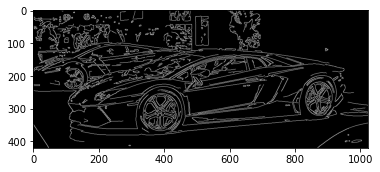

In [41]:
edges = cv2.Canny(new_carro,100,200)
write_picture_disk('canny_car.jpg',edges)
show_picture(read_picture_from_disk('canny_car.jpg'))